Bu dataset, Early Stage Diabetes Risk Prediction Dataset (Erken Aşama Diyabet Risk Tahmin Verisi) olarak bilinir ve diyabetin erken aşamalarındaki riski tahmin etmek için kullanılan çeşitli özellikleri içerir.
 UCI Makine Öğrenmesi Veri Deposu'nda yer alan bu veri kümesi, diyabetin erken teşhisini desteklemeye yönelik çalışmalar için çok faydalıdır.

Early Stage Diabetes Risk Prediction Dataset üzerinde binary classification kullanacağız. Bu sınıflandırma modelinde, çıktı olarak iki farklı sınıf (kategori) belirleyeceğiz: yüksek risk grubu ve düşük risk grubu. Model, bireylerin diyabet riski olup olmadığını tahmin ederek, her bir örneği bu iki sınıftan birine (yüksek riskli=1 veya düşük riskli = 0) atayacaktır. Bu tür bir binary classification modeli, diyabet riskinin belirlenmesinde önemli bir araç olarak kullanılabilir. Sunum dosyasında daha detaylı bilgiler olacaktır.

# Diyabet Risk Veri Seti Özellikleri:


*   Örneklem Sayısı: 520 örnek içerir

*   Özellik Sayısı: 16 özellik ve 1 hedef değişken (toplam 17 sütun)

Değişkenler:
1. **age**: Yaş (integer)

2. **gender**: Cinsiyet (categorical: erkek / kadın)

3. **polyuria**: Sık idrara çıkma durumu (binary: evet / hayır)

4. **polydipsia**: Aşırı susama durumu (binary: evet / hayır)

5. **sudden_weight_loss**: Ani kilo kaybı durumu (binary: evet / hayır)

6. **weakness**: Zayıflık durumu (binary: evet / hayır)

7. **polyphagia**: Aşırı açlık durumu (binary: evet / hayır)

8. **genital_thrush**: Genital mantar enfeksiyonu durumu (binary: evet / hayır)

9. **visual_blurring**: Görme bozukluğu durumu (binary: evet / hayır)

10. **itching**: Kaşıntı durumu (binary: evet / hayır)

11. **irritability**: Sinirlilik durumu (binary: evet / hayır)

12. **delayed_healing**: Geç iyileşme durumu (binary: evet / hayır)

13. **partial_paresis**: Kısmi felç durumu (binary: evet / hayır)

14. **muscle_stiffness**: Kas sertliği durumu (binary: evet / hayır)

15. **alopecia**: Saç dökülmesi durumu (binary: evet / hayır)

16. **obesity**: Obezite durumu (binary: evet / hayır)

Hedef Değişken:
class: Diyabet riski durumu (binary: 1 = riskli, 0 = risksiz)

##Kullanım Sebepleri:
Diyabet Riski Tahmini: Bu veri seti, bireylerin diyabet riskini tahmin etmek için kullanılır.

1. **Sınıflandırma Problemleri**: Makine öğrenmesi algoritmalarını, özellikle sınıflandırma problemleri için test etmek amacıyla yaygın olarak kullanılır.

2. **Eğitim Amaçlı**: Veri kümesi, öğrencilere ve araştırmacılara sınıflandırma ve veri ön işleme tekniklerini öğretmek için ideal bir kaynaktır.

3. **Benchmark**: Farklı sınıflandırma algoritmalarının performansını karşılaştırmak için standart bir test veri seti olarak hizmet eder.

4. **Özellik Mühendisliği**: Veriler arasındaki ilişkileri incelemek ve özellik seçimi/mühendisliği öğrenmek için kullanılır.

5. **Veri Ön İşleme**: İkili (binary) verilerle çalışırken, eksik veri, normalizasyon veya standartlaştırma gibi veri ön işleme tekniklerini uygulamak için kullanılır






İlk önce veritabanını yükleyip genel bilgileri görüntülüyoruz.

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


METADATA BİLGİLERİ
{'uci_id': 529, 'name': 'Early Stage Diabetes Risk Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/529/data.csv', 'abstract': 'This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient. ', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 520, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5VG8H', 'creators': [], 'intro_paper': {'ID': 397, 'type': 'NATIVE', 'title': 'Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques', 'authors': 'M. M. F. Islam, Rahatara Ferdousi, Sadikur 

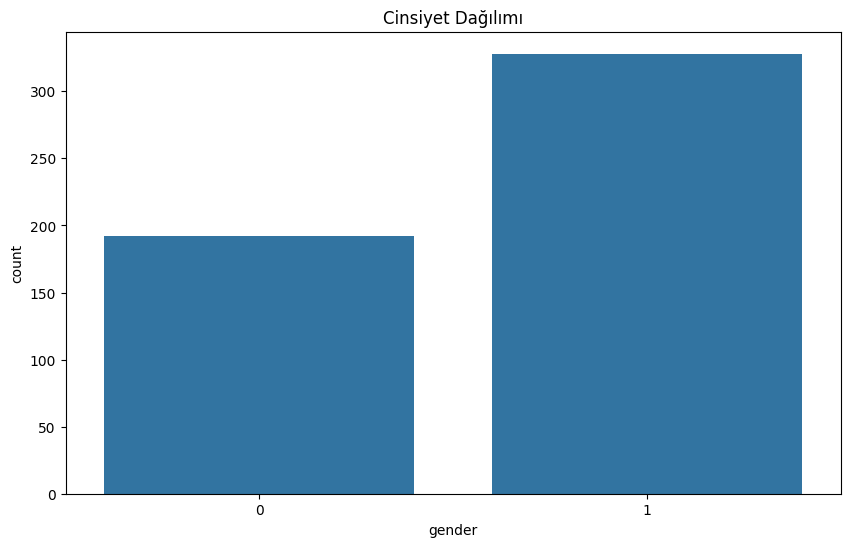

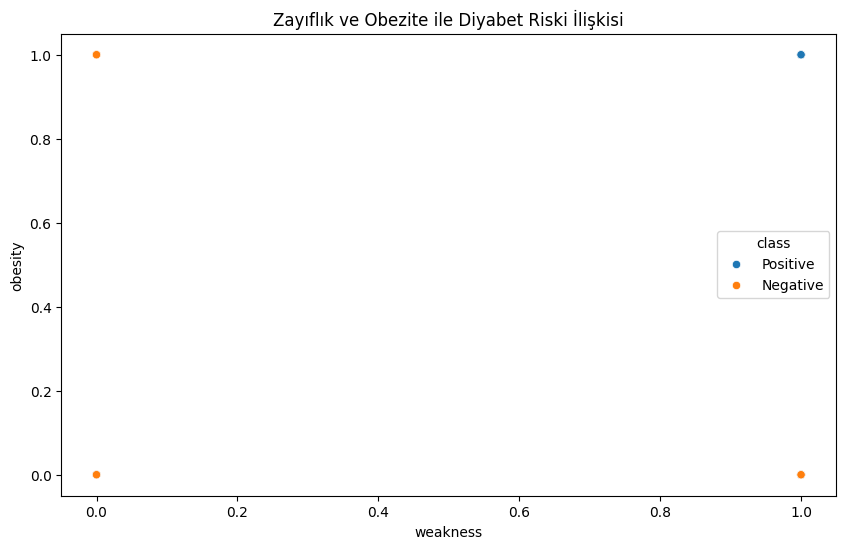

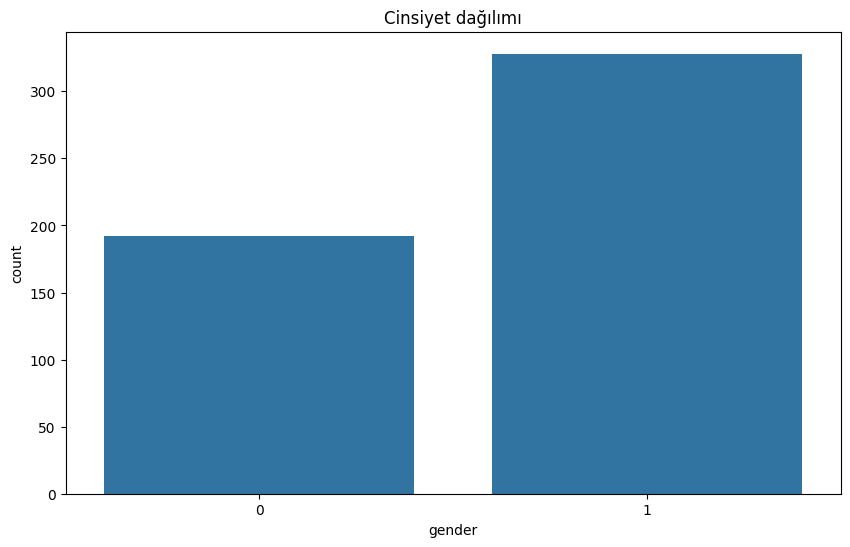

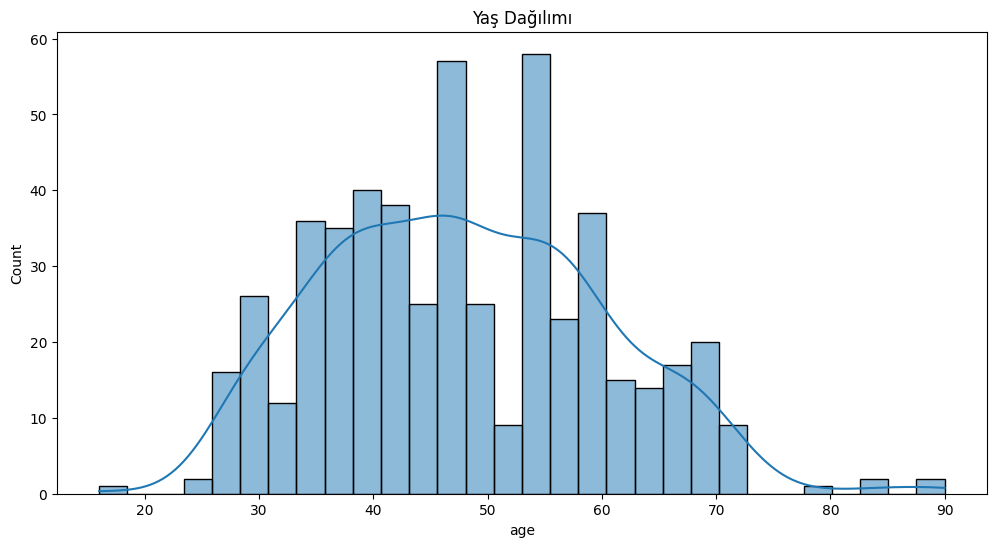

<Figure size 1500x1000 with 0 Axes>

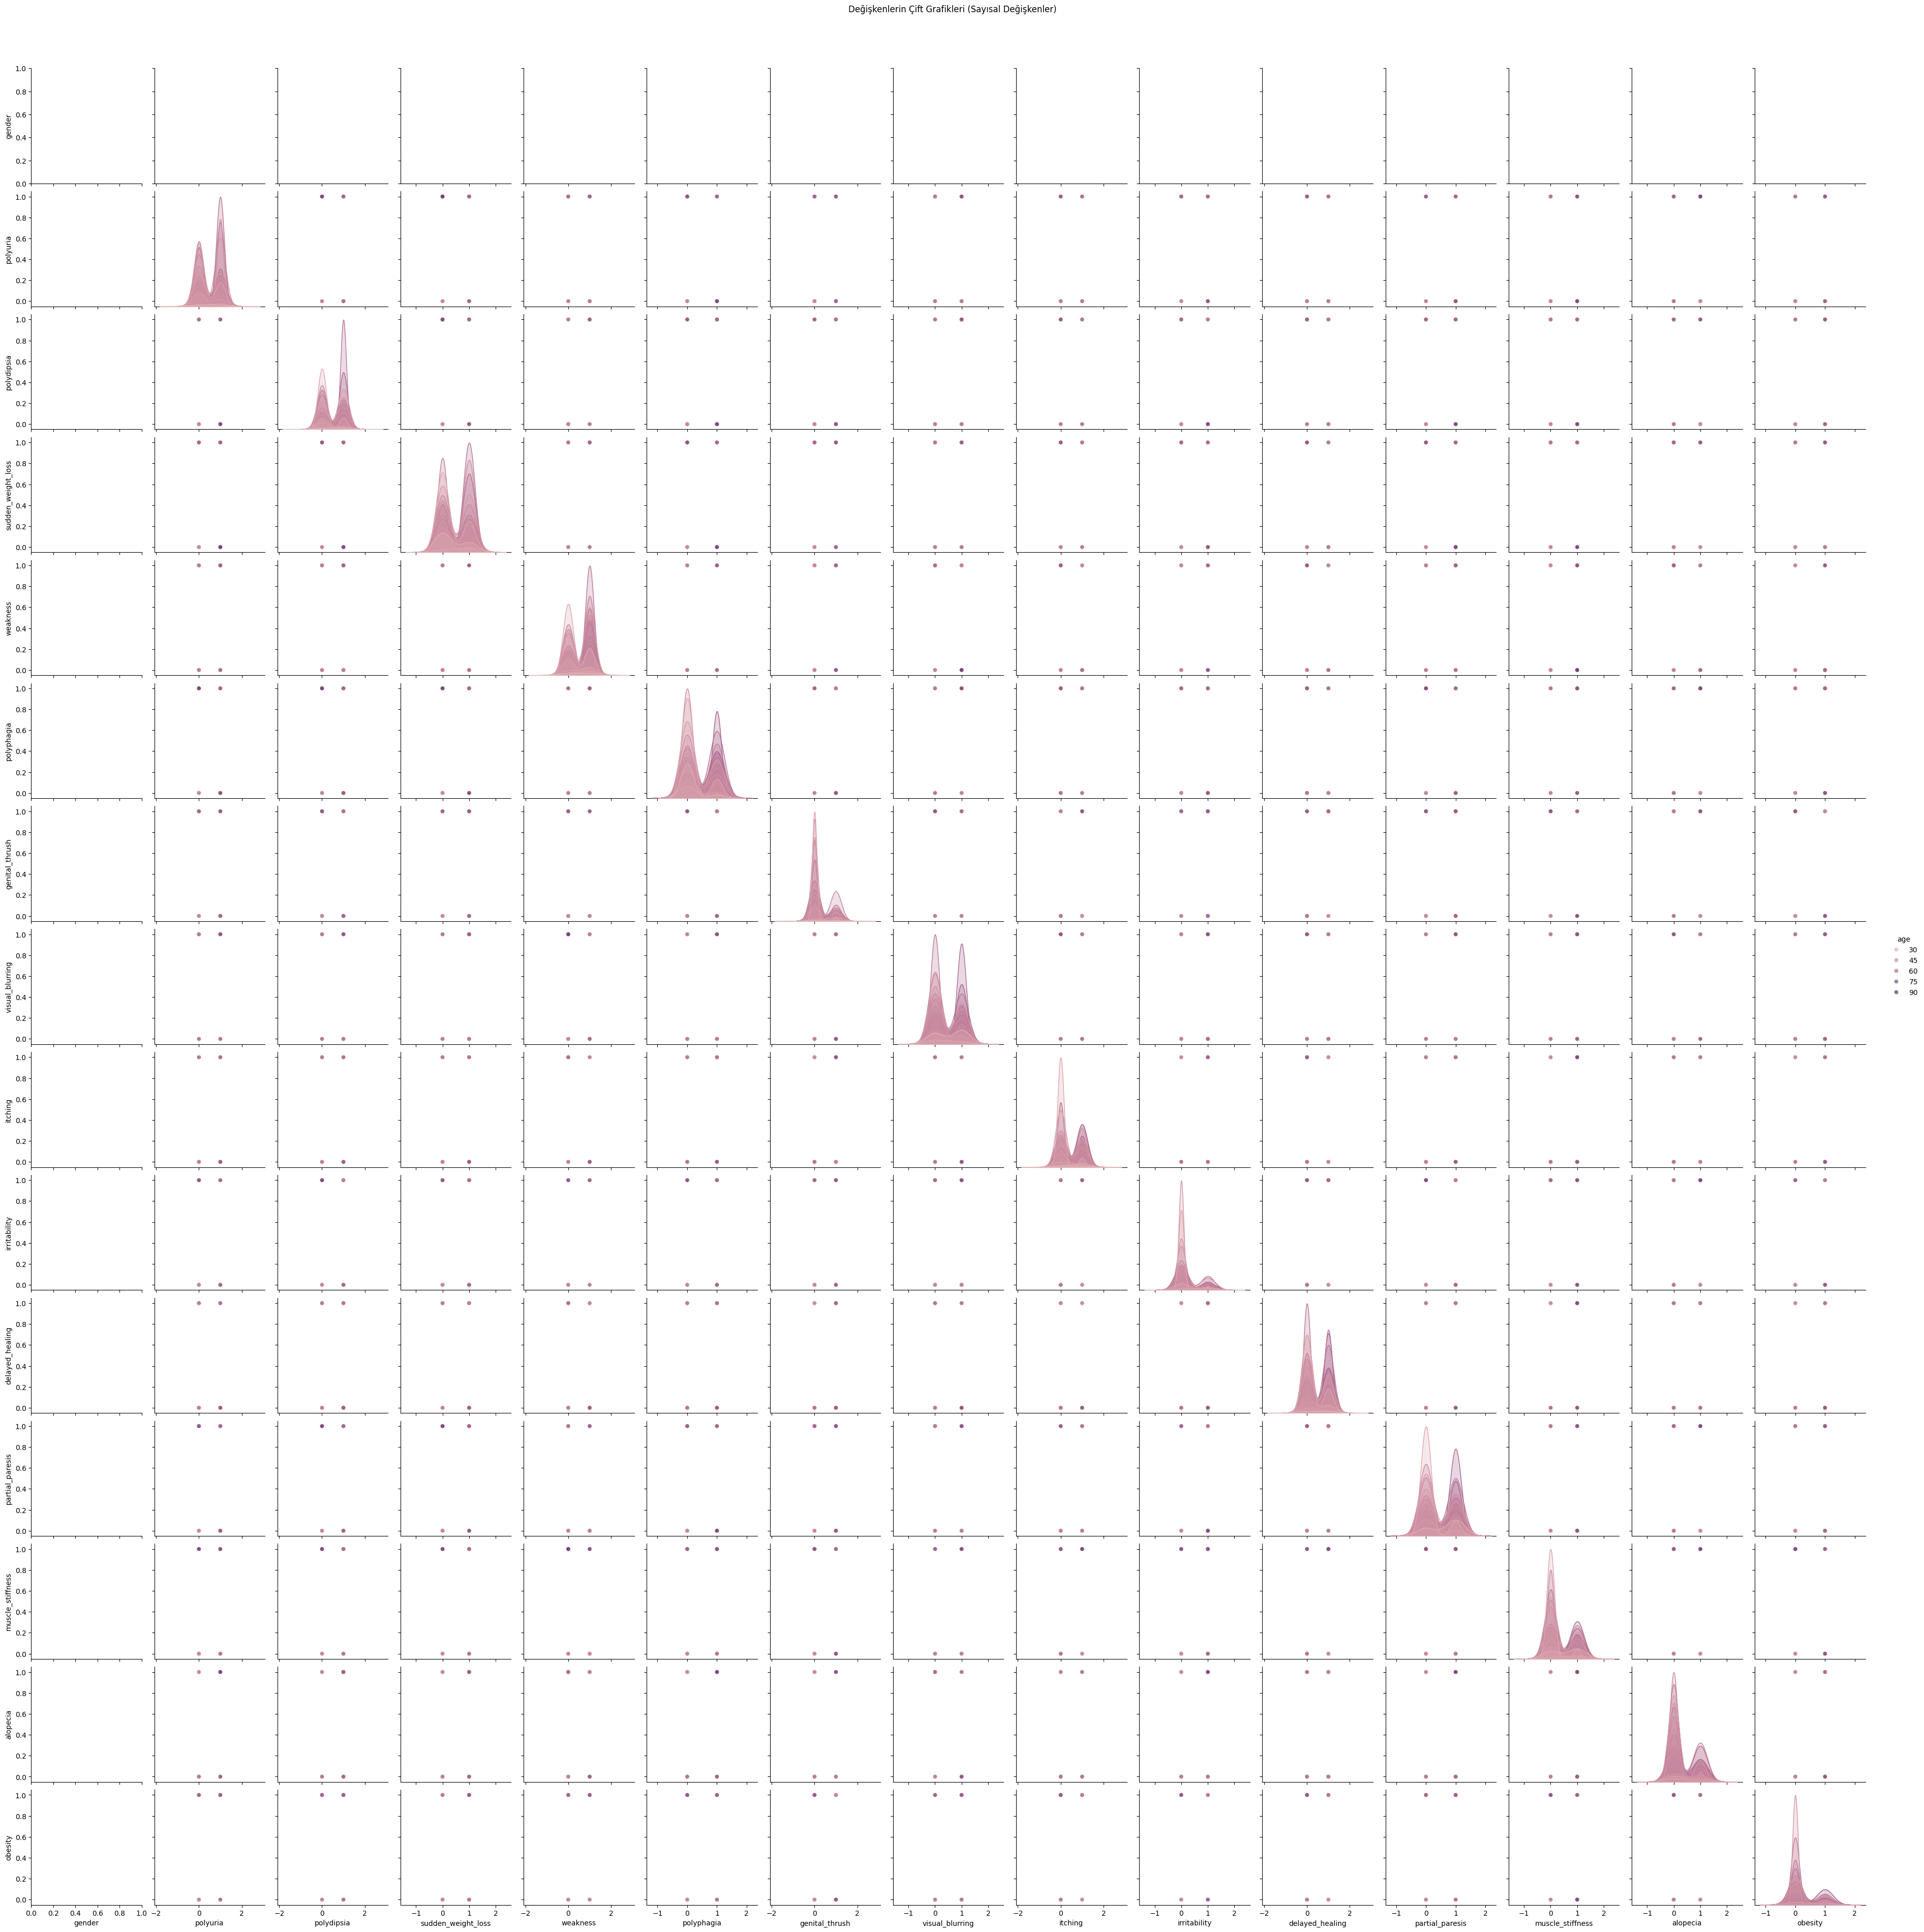

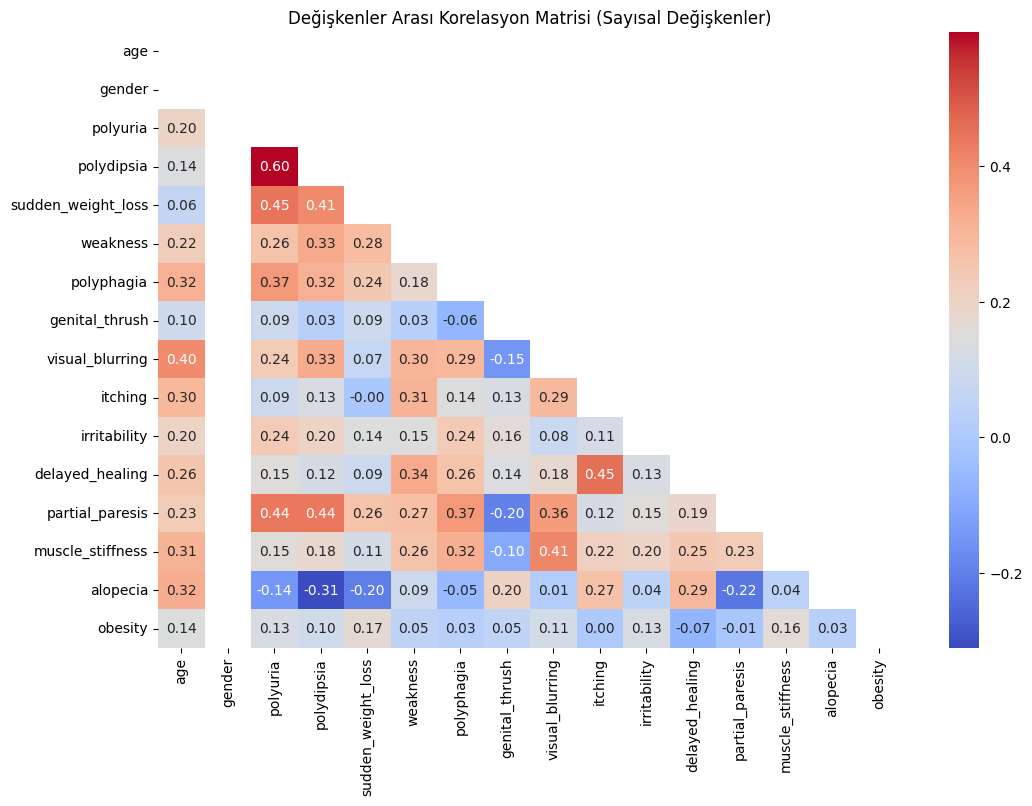

In [ ]:
# Gerekli kütüphaneleri yükleyelim
!pip install ucimlrepo pandas matplotlib seaborn scikit-learn tensorflow -q

# Gerekli kütüphaneleri içeri aktaralım
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
from tabulate import tabulate

# Veriyi alalım
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529)

# Veriyi dataframe olarak alalım
X = early_stage_diabetes_risk_prediction.data.features
y = early_stage_diabetes_risk_prediction.data.targets

# Veri setini tek bir DataFrame'de birleştirelim
df = pd.concat([X, y], axis=1)

# Önce kategorik sütunları sayısal hale getirelim
categorical_columns = ['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
                       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
                       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
                       'muscle_stiffness', 'alopecia', 'obesity']
# Label Encoding ile tüm kategorik sütunları sayısal hale getiriyoruz
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Hedef değişkeni sayısal hale getirelim (class)
y = label_encoder.fit_transform(y)  # Hedef değişken 'class'ı sayısallaştırıyoruz

# Veri setini eğitim ve test olarak bölelim
# Veri setini eğitim ve test olarak bölelim
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=42)

# Veriyi ölçeklendirelim
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Metadata bilgilerini görüntüleyelim
print("="*50)
print("METADATA BİLGİLERİ")
print("="*50)
print(early_stage_diabetes_risk_prediction.metadata)
print("\n")

# Değişken bilgilerini görüntüleyelim
print("="*50)
print("DEĞİŞKEN BİLGİLERİ")
print("="*50)
print(early_stage_diabetes_risk_prediction.variables)
print("\n")

# Verilerin ilk 10 satırını görüntüleyelim
print("="*50)
print("İLK 10 SATIR")
print("="*50)
print(df.head(10))
print("\n")


# Veri seti hakkında istatistiksel özetler:
print("="*50)
print("Veri Setinin İstatistiksel Özeti")
print("="*50)
print(df.describe())
print("\n")

# Eksik değer var mı kontrolü:
print("="*50)
print("Eksik Değer Kontrolü")
print("="*50)
print(df.isnull().sum())
print("\n")


# Veri setinin boyutunu görelim
print("="*50)
print("Veri Setinin Boyutları")
print("="*50)
print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}")
print("\n")


# Cinsiyet dağılımını görselleştirelim:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df)
plt.title("Cinsiyet Dağılımı")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='weakness', y='obesity', hue='class', data=df)
plt.title("Zayıflık ve Obezite ile Diyabet Riski İlişkisi")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df)
plt.title("Cinsiyet dağılımı")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Yaş Dağılımı')
plt.show()

# 'gender' sütununu sayısal hale getirmek
df['gender'] = df['gender'].map({'male': 1, 'female': 0})

# Sayısal sütunları seçmek
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Sayısal sütunları ve 'age' sütununu kullanarak pairplot oluşturmak
plt.figure(figsize=(15, 10))
plot_df = df[numeric_cols]  # sadece sayısal sütunlar
sns.pairplot(plot_df, hue='age', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Değişkenlerin Çift Grafikleri (Sayısal Değişkenler)', y=1.02)
plt.show()


# sayısal sütunları seçmek
numeric_df = df.select_dtypes(include=[np.number])
# Korelasyon hesaplama
correlation = numeric_df.corr()
# Korelasyon ısı haritası oluşturma
mask = np.triu(correlation)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Değişkenler Arası Korelasyon Matrisi (Sayısal Değişkenler)')
plt.show()



############################################





MLP eğitimi :

Eksik değer kontrolü:
age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64
   age  class  polyuria_No  polyuria_Yes  polydipsia_No  polydipsia_Yes  \
0   40      1         True         False          False            True   
1   58      1         True         False           True           False   
2   41      1        False          True           True           False   
3   45      1         True         False           True           False   
4   60      1        False          True          False            True   

   sudden_weight_loss_No  sudden_weight_loss_Yes  weakness_No  weakness_Yes  \
0                   True   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


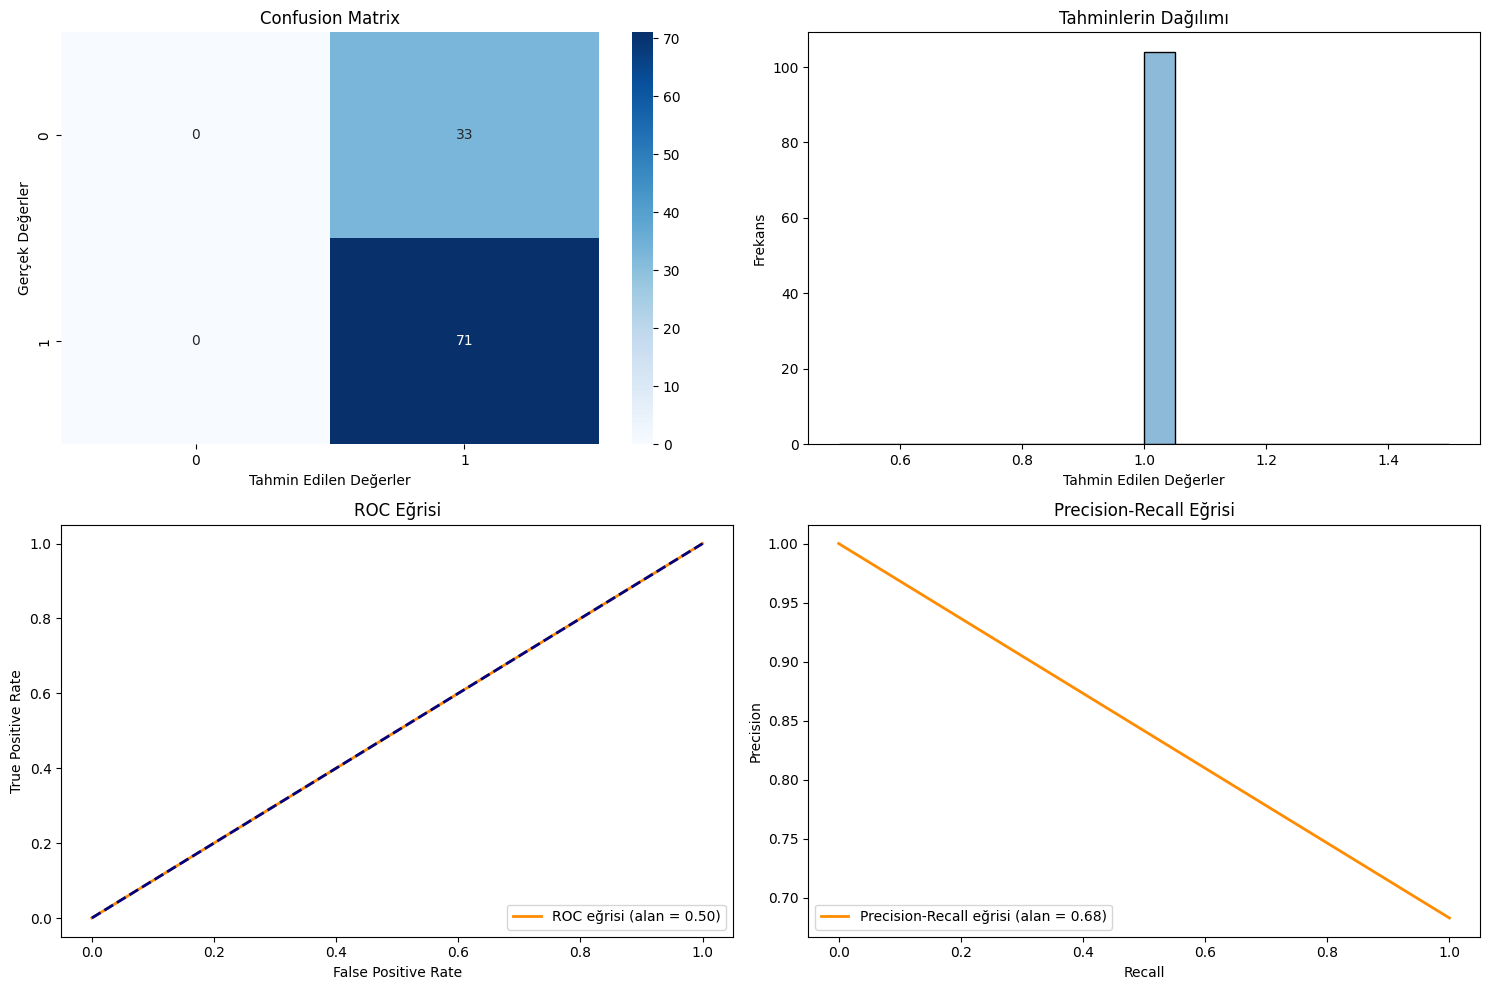

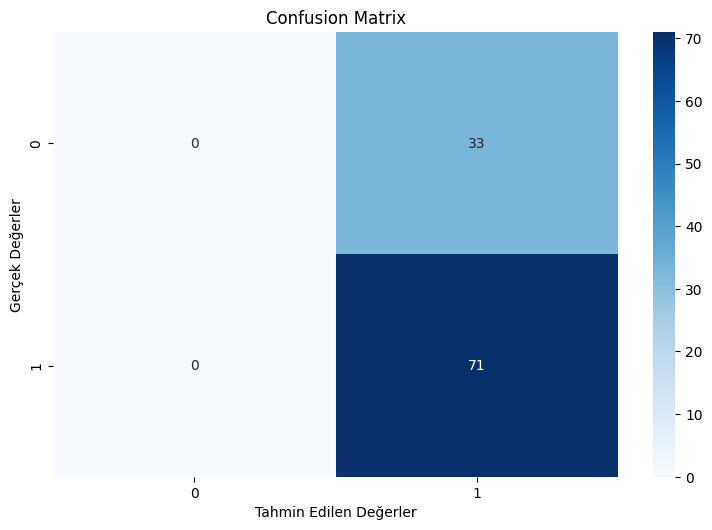

In [ ]:
# Gerekli kütüphaneleri ekleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.neural_network import MLPClassifier  # MLPClassifier kullanıyoruz
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Sınıflandırma metrikleri eklendi
import math

# Veri setini yükle
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529)

# Veriyi dataframe olarak alalım
X = early_stage_diabetes_risk_prediction.data.features
y = early_stage_diabetes_risk_prediction.data.targets

# Veri setini tek bir DataFrame'de birleştirelim
df = pd.concat([X, y], axis=1)

# 1. Eksik değer kontrolü ve temizleme
print("Eksik değer kontrolü:")
print(df.isnull().sum())
# Eksik değer yoksa bu adımı atlayabiliriz

# Kategorik ve sayısal sütunları tanımlayalım
categorical_cols = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
                    'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing',
                    'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'gender']  # Kategorik sütunlar

numerical_cols = ['age']  # Sayısal sütunlar

# Hedef sütun ('class') kategorik verileri sayısal verilere dönüştür
# 'Positive' -> 1, 'Negative' -> 0
df['class'] = df['class'].map({'Positive': 1, 'Negative': 0})

# Kategorik verileri One Hot Encoding ile sayısallaştırma
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Sonuçları kontrol etme
print(df_encoded.head())

# Eğitim verisi özeti
print("\nEğitim verisi özeti:")
print(df.describe())

# Veriyi eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('class', axis=1), df_encoded['class'], test_size=0.2, random_state=42)

# Veri ön işleme adımını oluşturuyoruz (standardizasyon ve one-hot encoding)
# numerical_cols and categorical_cols are updated to reflect the columns in df_encoded
numerical_cols_encoded = ['age']  # Numerical columns in df_encoded
categorical_cols_encoded = [col for col in X_train.columns if col not in numerical_cols_encoded]  # Categorical columns in df_encoded

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_encoded),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols_encoded)  # handle_unknown='ignore' for unseen categories in test data
    ])

# 5. MLP modelini oluştur (3 gizli katman: 30, 20, 10 nöron)
mlp = MLPClassifier(  # MLPClassifier kullanıyoruz
    hidden_layer_sizes=(30, 20, 10),
    activation='relu',
    solver='sgd',
    learning_rate_init=0.01,
    momentum=0.9,
    max_iter=1000,
    random_state=42,
    verbose=True,
    early_stopping=True,
    validation_fraction=0.1
)

# 6. Pipeline oluştur
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', mlp)
])

# 7. Veri ön işleme adımını manuel yapalım
print("Veri ön işleme adımı...")

# Veriyi ölçeklendirerek eğitim ve test setlerini dönüştürelim
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Ön işleme sonrası verilerin durumunu kontrol et
print("\nÖn işleme sonrası veriler:")
print(f"X_train_scaled boyutu: {X_train_scaled.shape}")
print(f"X_train_scaled min: {X_train_scaled.min()}, max: {X_train_scaled.max()}")

# Modeli eğit
print("\nModel eğitim başlıyor...")
mlp.fit(X_train_scaled, y_train.values.ravel())  # .values.ravel() is used to convert y_train to a 1D array
print("Model eğitimi tamamlandı!")

# 8. Test seti üzerinde tahmin yap
y_pred = mlp.predict(X_test_scaled)

# 9. Model performans metriklerini hesapla
# Sınıflandırma metrikleri kullanıyoruz
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Performans Metrikleri:")
print(f"Doğruluk: {accuracy:.4f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 10. Gerçek değerler ile tahmin edilen değerleri karşılaştır
plt.figure(figsize=(15, 10))

# a) Confusion Matrix
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('Confusion Matrix')

# b) Tahminlerin Dağılımı
plt.subplot(2, 2, 2)
sns.histplot(y_pred, bins=20, kde=True) # Tahminlerin dağılımını gösteren histogram
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Frekans')
plt.title('Tahminlerin Dağılımı')

# c) ROC Eğrisi (Receiver Operating Characteristic)
# ROC eğrisi için gerekli kütüphaneleri ekleyin
from sklearn.metrics import roc_curve, auc
# ROC eğrisini hesaplayın
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# ROC eğrisini çizin
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (alan = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")

# d) Precision-Recall Eğrisi
# Precision-Recall eğrisi için gerekli kütüphaneleri ekleyin
from sklearn.metrics import precision_recall_curve, average_precision_score
# Precision-Recall eğrisini hesaplayın
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
# Precision-Recall eğrisini çizin
plt.subplot(2, 2, 4)
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall eğrisi (alan = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Eğrisi')
plt.legend(loc="lower left")


plt.tight_layout()
plt.savefig('diabetes_mlp_results.png')  # Dosya adını değiştirdik
plt.show()

# 10. Gerçek değerler ile tahmin edilen değerleri karşılaştır
plt.figure(figsize=(15, 10))
# a) Confusion Matrix
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('Confusion Matrix')

# Diğer grafikler (isteğe bağlı olarak ekleyebilirsiniz)
# ...

plt.tight_layout()
plt.savefig('diabetes_mlp_results.png')  # Dosya adını değiştirdik
plt.show()

Farklı eğitim algoritmaları ile eğitim yapalım ve sonuçlara bakalım.

{'uci_id': 529, 'name': 'Early Stage Diabetes Risk Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/529/data.csv', 'abstract': 'This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient. ', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 520, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5VG8H', 'creators': [], 'intro_paper': {'ID': 397, 'type': 'NATIVE', 'title': 'Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques', 'authors': 'M. M. F. Islam, Rahatara Ferdousi, Sadikur Rahman, Humayra Yas

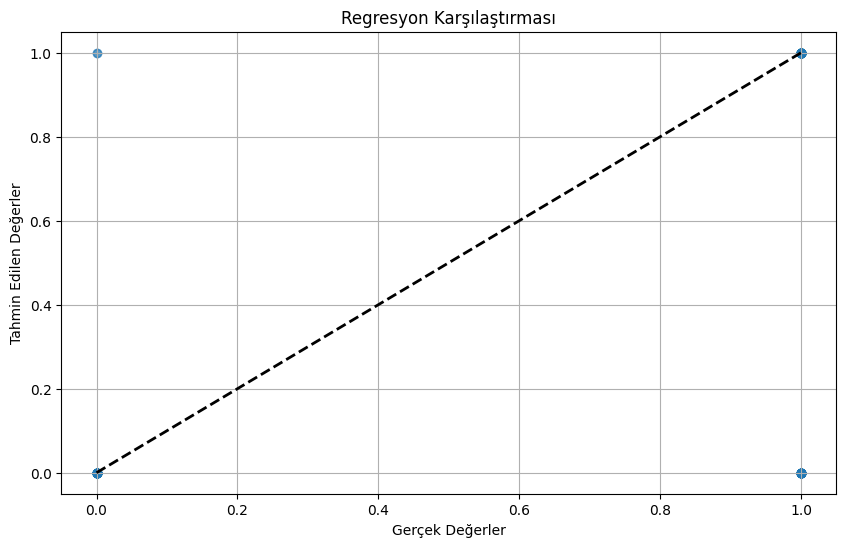

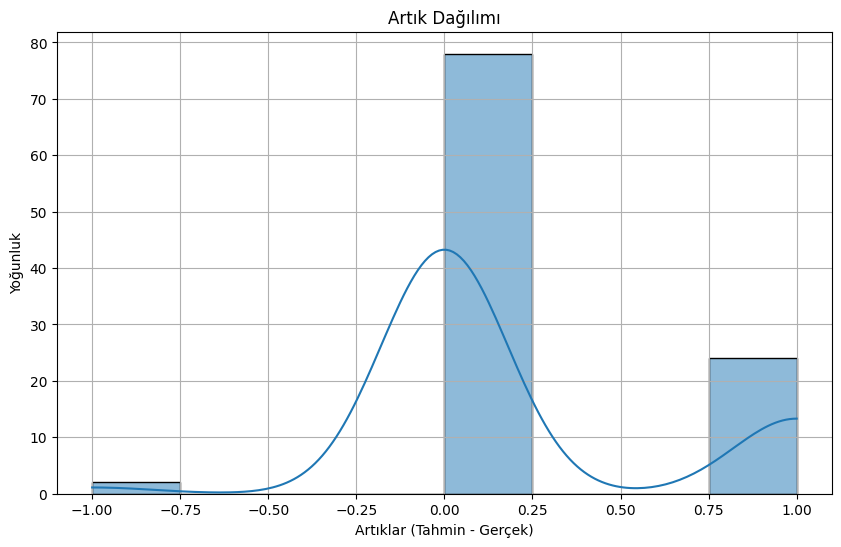

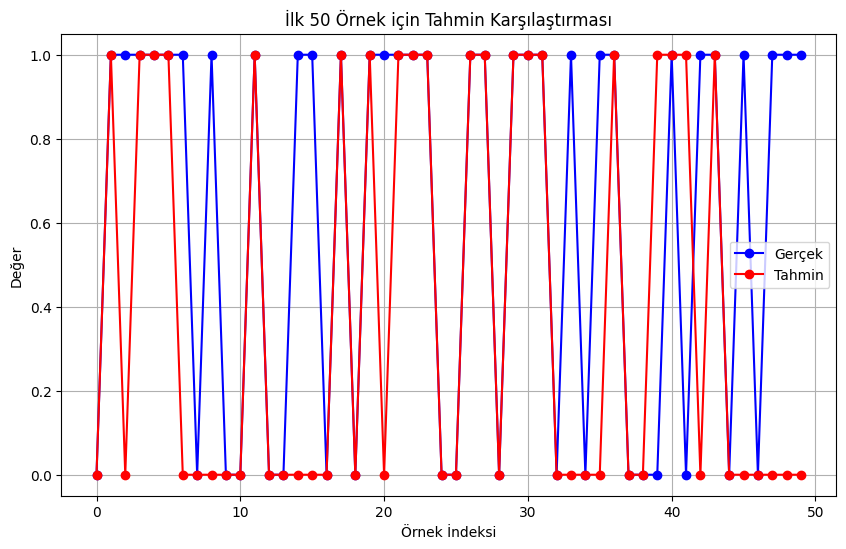

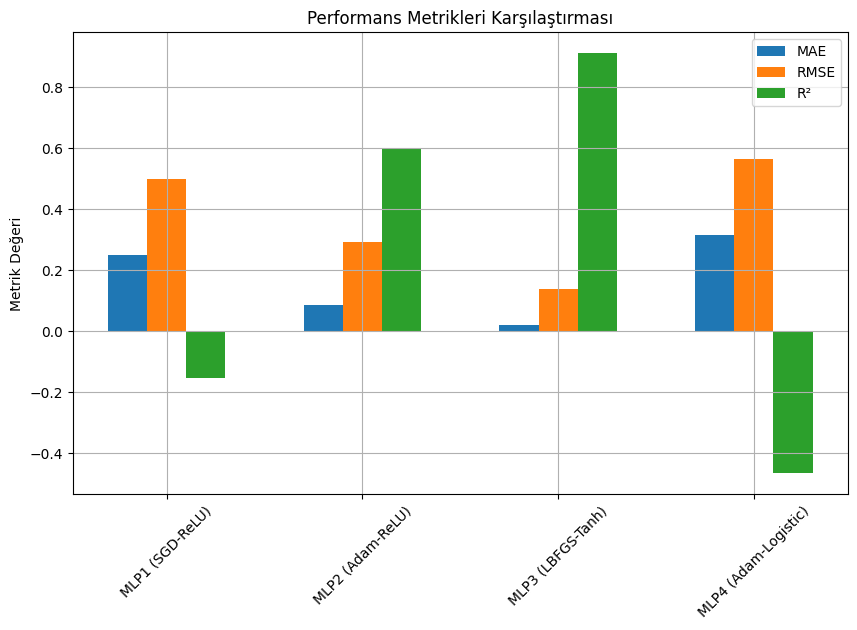

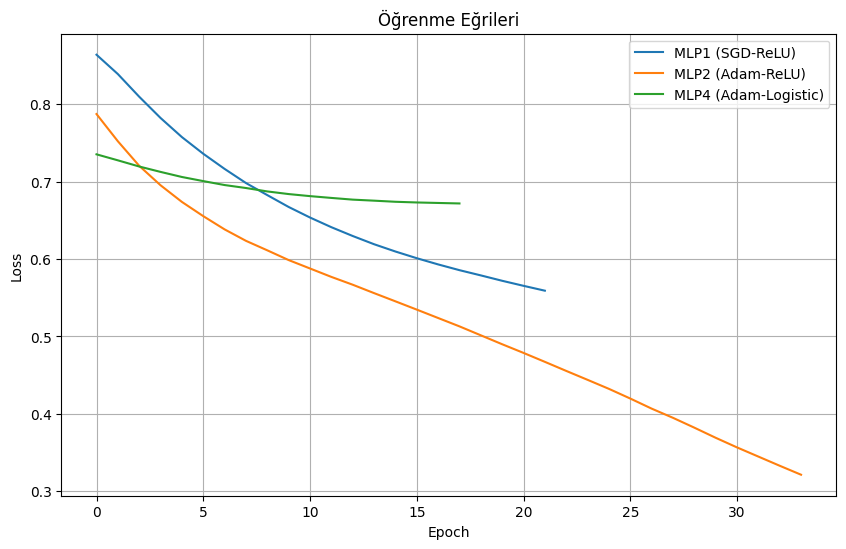

<ipython-input-43-7700591cab5f>:237: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(residuals_data, labels=model_names)


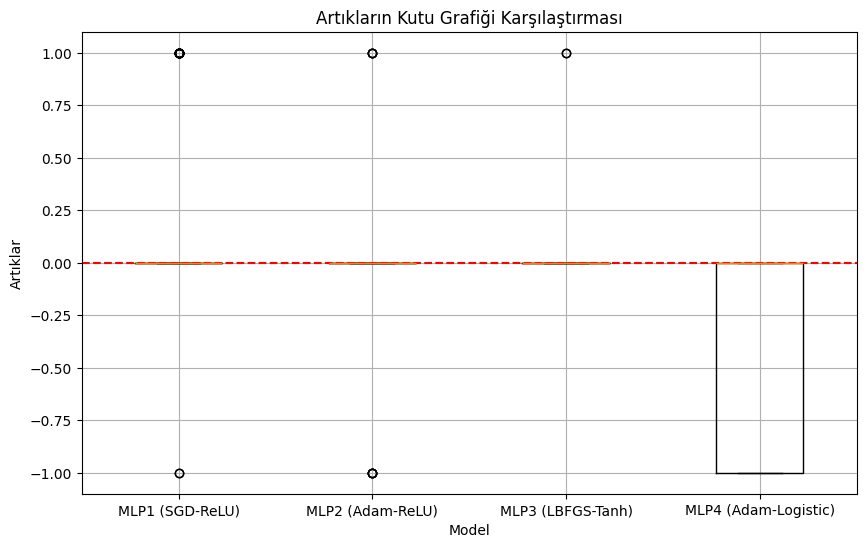

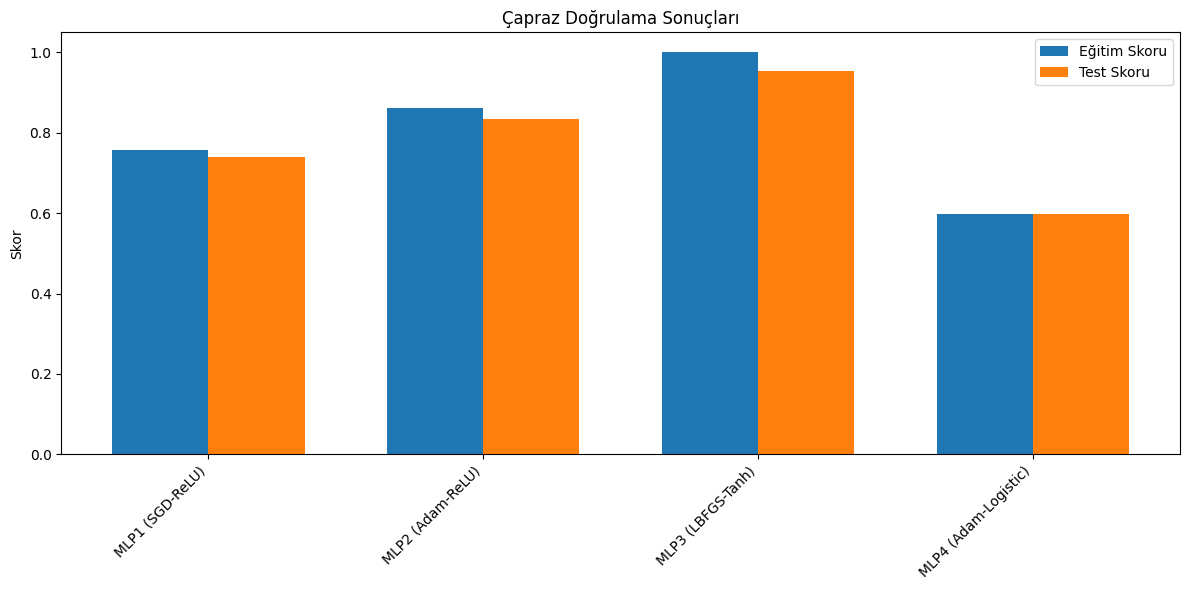

In [ ]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder  # LabelEncoder eklendi
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, make_scorer, mean_absolute_error, mean_squared_error, r2_score # accuracy_score ve make_scorer eklendi
import time
from tabulate import tabulate

# Veri setini al
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529)

# Veri (pandas dataframe olarak)
X = early_stage_diabetes_risk_prediction.data.features
y = early_stage_diabetes_risk_prediction.data.targets

# Hedef değişkeni Label Encoding ile sayısal hale getirelim
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.values.ravel())  # y'yi Label Encoding ile dönüştür

# Meta veriler
print(early_stage_diabetes_risk_prediction.metadata)
print(early_stage_diabetes_risk_prediction.variables)

# Veri hakkında bilgi
print(f"Veri seti boyutu: {X.shape[0]} örnek, {X.shape[1]} özellik")
print("Hedef değişken: ", 'class')  # Hedef değişken artık 'class'

# Veri ön işleme adımını oluşturuyoruz (standardizasyon ve one-hot encoding)
numerical_cols_encoded = ['age']  # Numerical columns in df_encoded
categorical_cols_encoded = [col for col in X.columns if col not in numerical_cols_encoded]  # Categorical columns

# Veriyi eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_encoded),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols_encoded)
    ])

# MLP modelleri tanımla
mlp_models = {
    'MLP1 (SGD-ReLU)': MLPClassifier(
        hidden_layer_sizes=(40, 30, 20, 10),
        activation='relu',
        solver='sgd',
        learning_rate_init=0.01,
        momentum=0.6,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10
    ),
    'MLP2 (Adam-ReLU)': MLPClassifier(
        hidden_layer_sizes=(30, 20, 10),
        activation='relu',
        solver='adam',
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    ),
    'MLP3 (LBFGS-Tanh)': MLPClassifier(
        hidden_layer_sizes=(30, 20, 10),
        activation='tanh',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ),
    'MLP4 (Adam-Logistic)': MLPClassifier(
        hidden_layer_sizes=(50, 30, 20),
        activation='logistic',
        solver='adam',
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )
}

# Sonuçları ve tahminleri saklamak için veri yapıları
results = {}
predictions = {}
training_times = {}

# Model değerlendirme metriklerini hesaplama fonksiyonu
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    return {'MAE': mae, 'RMSE': rmse, 'R²': r2}

# Modelleri eğit ve test et
print("Model eğitimi başlıyor...")
for name, model in mlp_models.items():
    print(f"\n{name} eğitiliyor...")
    start_time = time.time()

    # Cross-validation (Çapraz doğrulama) - accuracy kullanarak
    cv_results = cross_validate(
        model,
        preprocessor.fit_transform(X_train),
        y_train,
        cv=5,
        scoring=make_scorer(accuracy_score),  # accuracy_score kullanarak
        return_train_score=True
    )

    training_time = time.time() - start_time
    training_times[name] = training_time

    # Çapraz doğrulama sonuçlarını kaydet
    results[name] = {
        'mean_train_score': cv_results['train_score'].mean(),
        'mean_test_score': cv_results['test_score'].mean(),
        'fit_time': cv_results['fit_time'].mean(),
        'score_time': cv_results['score_time'].mean()
    }

    print(f"{name} eğitimi tamamlandı. Eğitim süresi: {training_time:.2f} saniye.")

    # Modeli eğit ve test et
    model.fit(preprocessor.fit_transform(X_train), y_train)
    y_pred = model.predict(preprocessor.transform(X_test))
    predictions[name] = y_pred

    # Model değerlendirme metriklerini hesapla
    metrics = calculate_metrics(y_test, y_pred)
    results[name].update(metrics)  # Metrikleri sonuçlara ekle

# Çapraz doğrulama sonuçlarını tablo olarak yazdır
cv_results_df = pd.DataFrame(results).T
cv_results_df = cv_results_df.round(4)

print("\nÇapraz Doğrulama Sonuçları:")
try:
    print(tabulate(cv_results_df, headers='keys', tablefmt='grid'))
except ImportError:
    print(cv_results_df)

# Sonuçları tablo olarak görüntüle
results_df = pd.DataFrame(results).T
results_df['Eğitim Süresi (sn)'] = pd.Series(training_times)
results_df = results_df.round(4)

print("\nMLP Modelleri Performans Karşılaştırma Tablosu:")
try:
    print(tabulate(results_df, headers='keys', tablefmt='grid'))
except ImportError:
    print(results_df)

# Gerçek ve tahmin edilen değerler tablosu
comparison_df = pd.DataFrame({'Gerçek Değerler': y_test.flatten(), 'Tahmin Edilen Değerler': predictions[list(predictions.keys())[0]]})
print("\nGerçek ve Tahmin Edilen Değerler Tablosu:")
print(tabulate(comparison_df, headers='keys', tablefmt='grid'))

# Görselleştirmeler:

# 1. Regresyon Grafiği
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions[list(predictions.keys())[0]], alpha=0.5)  # İlk modelin tahminleri
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Referans çizgisi
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Regresyon Karşılaştırması')
plt.grid(True)
plt.show()

# 2. Artık Dağılımı
plt.figure(figsize=(10, 6))
residuals = y_test - predictions[list(predictions.keys())[0]]  # İlk modelin artıkları
sns.histplot(residuals, kde=True)
plt.xlabel('Artıklar (Tahmin - Gerçek)')
plt.ylabel('Yoğunluk')
plt.title('Artık Dağılımı')
plt.grid(True)
plt.show()

# 3. Tahmin Performansı (İlk 50 örnek)
plt.figure(figsize=(10, 6))
sample_size = min(50, len(y_test))
plt.plot(range(sample_size), y_test[:sample_size], 'bo-', label='Gerçek')
plt.plot(range(sample_size), predictions[list(predictions.keys())[0]][:sample_size], 'ro-', label='Tahmin')  # İlk modelin tahminleri
plt.xlabel('Örnek İndeksi')
plt.ylabel('Değer')
plt.title('İlk 50 Örnek için Tahmin Karşılaştırması')
plt.legend()
plt.grid(True)
plt.show()

# 4. Metrik Karşılaştırma Grafiği
metrics = ['MAE', 'RMSE', 'R²']
model_names = list(results.keys())
metric_values = [[results[model][metric] for metric in metrics] for model in model_names]

plt.figure(figsize=(10, 6))
x_pos = np.arange(len(model_names))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x_pos + i * width, [values[i] for values in metric_values], width, label=metric)

plt.xticks(x_pos + width, model_names, rotation=45)
plt.ylabel('Metrik Değeri')
plt.title('Performans Metrikleri Karşılaştırması')
plt.legend()
plt.grid(True)
plt.show()

# 5. Öğrenme Eğrileri
plt.figure(figsize=(10, 6))
for name, model in mlp_models.items():
    if hasattr(model, 'loss_curve_'):
        plt.plot(model.loss_curve_, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Öğrenme Eğrileri')
plt.legend()
plt.grid(True)
plt.show()

# 6. Artıkların Kutu Grafiği
plt.figure(figsize=(10, 6))
residuals_data = [y_test - predictions[model] for model in model_names]
plt.boxplot(residuals_data, labels=model_names)
plt.axhline(y=0, color='r', linestyle='--')  # Referans çizgisi
plt.xlabel('Model')
plt.ylabel('Artıklar')
plt.title('Artıkların Kutu Grafiği Karşılaştırması')
plt.grid(True)
plt.show()
# Çapraz doğrulama sonuçlarını görselleştirme (Bar Grafiği)
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
train_scores = [results[model]['mean_train_score'] for model in model_names]
test_scores = [results[model]['mean_test_score'] for model in model_names]

x_pos = np.arange(len(model_names))
width = 0.35

plt.bar(x_pos, train_scores, width, label='Eğitim Skoru')
plt.bar(x_pos + width, test_scores, width, label='Test Skoru')

plt.xticks(x_pos + width / 2, model_names, rotation=45, ha='right')
plt.ylabel('Skor')
plt.title('Çapraz Doğrulama Sonuçları')
plt.legend()
plt.tight_layout()
plt.show()